<h1 style="text-align:center;text-decoration:underline;color:#B45F04">TASK 1 : Predict Student's Score using Supervised ML</h1>

### As part of Graduate Rotational Internship Program (GRIP)
### Author: Ribin Baby
* Predict the percentage of an student based on the no. of study hours.
* This is a <span style="background-color: #FFFF00">simple linear regression</span> task as it involves just 2 variables.
* Question: <span style="background-color: #FFFF00"> What will be predicted score if a student studies for 9.25 hrs/ day? </span>

## importing Libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df = pd.read_csv(url)
print("Shape of dataframe: ", df.shape)
df.head()

Shape of dataframe:  (25, 2)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


* The dataset is a small dataset with only 25 entries and 2 columns.
* our task is to create a model to predict the 'Scores' using 'Hours' as a feature.

In [8]:
# checking for null value
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

* There is no null value in the data

## Discriptive Statistics

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


* not detected any outliers or skewness

## Data visualization

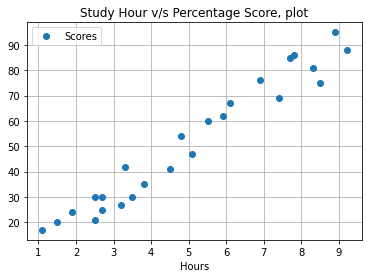

In [27]:
df.plot(x='Hours', y='Scores', style='o')
plt.grid()
plt.title("Study Hour v/s Percentage Score, plot")
plt.show()

* The relationship between the 2 parameters/variables ['Hours' and 'Scores'] are linear in nature.

## Data Preperation
* in this step we devide the data into attributes ['Input'] and labels ['Output']

In [68]:
X = df.iloc[:, :-1].values  # attribute
y = df.iloc[:, 1].values # Labels

# normalizing X
# X = (X - X.min()) / (X.max() - X.min())

* in next step we further split the data for Training and Testing purpose

In [84]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6)
print(x_train.shape, x_test.shape)

(20, 1) (5, 1)


* so after train test splitting we have 20 data points for training and 5 data points for testing

## Training the Algorithm
* We are going to impliment the Linear regression model in this step, our data have some linear property so Linear Regresssion is the best match.

In [85]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(x_train, y_train)

print("Training complete.")

Training complete.


* <strong> Equation of line
$ `y = mx + c` $ </strong>
* here `m -> is the slope of the line` and `c -> is the y intercept`

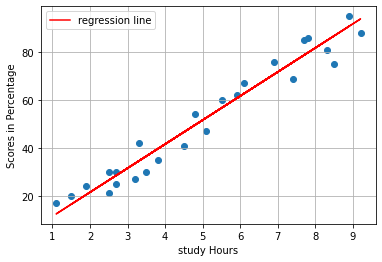

In [86]:
# making the regression function, 'equation of line'
line = regressor.coef_*X + regressor.intercept_

# regression plot along with the data,  so we can visualize how well the regressor fit in the data
plt.scatter(X, y)
plt.plot(X, line, color='r', label='regression line')
plt.xlabel('study Hours')
plt.ylabel('Scores in Percentage')
plt.grid()
plt.legend()
plt.show()

* we can see that the regression function fits well in the data, hope will give correct predictions

## Making Predictions
* we have build our model , so we can test our model with some new unseen data points.

In [87]:
y_pred = regressor.predict(x_test)

df_predict = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_predict

,Actual,Predicted
0,35,39.594215
1,60,56.684534
2,20,16.472019
3,88,93.881110
4,81,84.833294


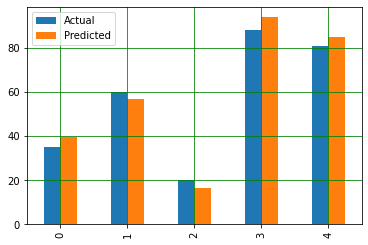

In [88]:
# plot.1 b/w actual and predicted lables
df_predict.plot(kind='bar')
plt.grid(color='g')
plt.show()

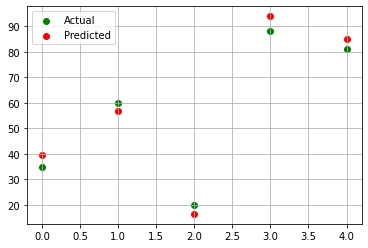

In [89]:
# plot.2 b/w actual and predicted lables
plt.scatter(range(5), y_test, c='g', label='Actual')
plt.scatter(range(5), y_pred, c='r', label='Predicted')
plt.grid()
plt.legend()
plt.show()

In [90]:
# testing on some new values as mentioned in the question
hours = 9.5
test = np.array([hours]).reshape(1,-1)
new_pred = regressor.predict(test)

print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(new_pred[0]))

No of Hours = 9.5
Predicted Score = 96.8970484061393


## Model Evaluation

In [91]:
from sklearn import metrics

print("Mean Square Error(MSE)      : ", metrics.mean_squared_error(y_test, y_pred))
print("Mean Absolute Error(MAE)    : ", metrics.mean_absolute_error(y_test, y_pred))
print("Root Mean Square Error(RMSE): ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R-square                    : ", metrics.r2_score(y_test, y_pred))

Mean Square Error(MSE)      :  18.7654746734428
Mean Absolute Error(MAE)    :  4.230413223140487
Root Mean Square Error(RMSE):  4.331913511768534
R-square                    :  0.9723939704109644


<strong><em style='color:#0000FF'>## THE END ##</em></strong>